# Softmax Regression with TensorFlow - Interactive Demo

This notebook demonstrates the implementation and training of Softmax Regression using TensorFlow for MNIST digit classification.

## Features:
- Data preprocessing and visualization
- Model creation and compilation
- Training with monitoring
- Evaluation and analysis
- Custom training loop demonstration

In [1]:
# Import libraries
import sys
import os

# Add src to path
sys.path.append('../')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from src.model.softmax_regression import SoftmaxRegression
from src.data.data_preprocessing import load_and_preprocess_mnist
from src.training.trainer import ModelTrainer
from src.training.custom_trainer import CustomTrainer
from src.utils.visualization import *
from src.utils.evaluation import *

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.20.0


In [2]:
# Load and preprocess MNIST data
(X_train, Y_train), (X_val, Y_val) = load_and_preprocess_mnist()

print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Input features: {X_train.shape[1]}")
print(f"Output classes: {Y_train.shape[1]}")

Training samples: 60000
Validation samples: 10000
Input features: 784
Output classes: 10


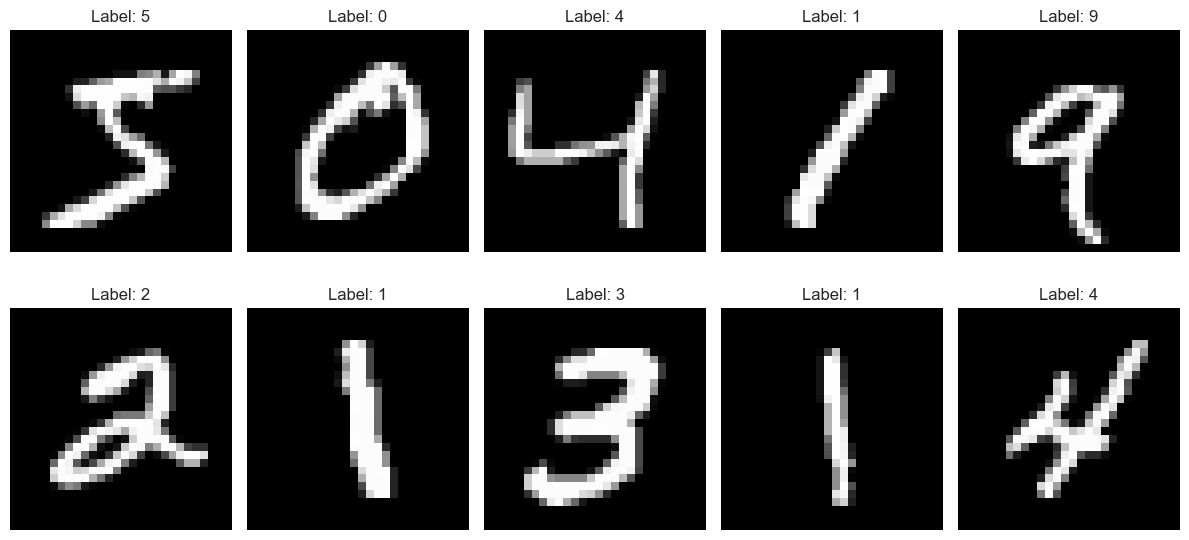

In [3]:
# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row = i // 5
    col = i % 5
    
    # Reshape back to 28x28 for display
    image = X_train[i].numpy().reshape(28, 28)
    true_label = tf.argmax(Y_train[i]).numpy()
    
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f'Label: {true_label}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Create and compile model
model_builder = SoftmaxRegression(input_size=784, num_classes=10)
model = model_builder.create_and_compile(
    learning_rate=0.01,
    optimizer='sgd'
)

model_builder.get_model_summary()

d:\Code\ProtonX\tf-foundation\softmax-regression-tutorial\softmax-regression-tensorflow\.venv\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train model
trainer = ModelTrainer(model)

history = trainer.train(
    X_train, Y_train,
    X_val, Y_val,
    epochs=15,
    batch_size=128,
    verbose=1
)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7082 - loss: 1.2723 - val_accuracy: 0.8351 - val_loss: 0.8075
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8411 - loss: 0.7132 - val_accuracy: 0.8608 - val_loss: 0.6069
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8580 - loss: 0.5867 - val_accuracy: 0.8741 - val_loss: 0.5264
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8674 - loss: 0.5257 - val_accuracy: 0.8816 - val_loss: 0.4812
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8737 - loss: 0.4884 - val_accuracy: 0.8860 - val_loss: 0.4514
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8787 - loss: 0.4627 - val_accuracy: 0.8900 - val_loss: 0.4299
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8826 - loss: 0.4435 - val_accuracy: 0.8925 - val_loss: 0.4139
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8849 - loss: 0.4286 - val_accuracy: 0.

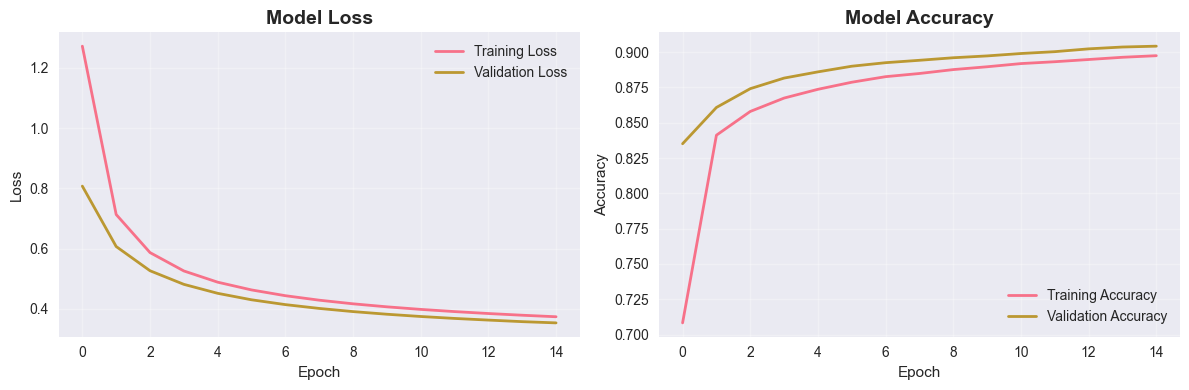

In [6]:
# Plot training history
plot_training_history(history.history, show_plot=True)

In [7]:
# Evaluate model
val_loss, val_accuracy = trainer.evaluate(X_val, Y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Sample predictions
Y_val_classes = tf.argmax(Y_val, axis=1).numpy()
results = trainer.predict_samples_with_confidence(
    X_val[:10], Y_val_classes[:10], num_samples=10
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9042 - loss: 0.3532
Validation Loss: 0.3532
Validation Accuracy: 0.9042
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction Results:
Sample 0: True=7, Predicted=7, Confidence=0.992, Correct=✓
Sample 1: True=2, Predicted=2, Confidence=0.840, Correct=✓
Sample 2: True=1, Predicted=1, Confidence=0.937, Correct=✓
Sample 3: True=0, Predicted=0, Confidence=0.994, Correct=✓
Sample 4: True=4, Predicted=4, Confidence=0.853, Correct=✓
Sample 5: True=1, Predicted=1, Confidence=0.971, Correct=✓
Sample 6: True=4, Predicted=4, Confidence=0.854, Correct=✓
Sample 7: True=9, Predicted=9, Confidence=0.813, Correct=✓
Sample 8: True=5, Predicted=6, Confidence=0.744, Correct=✗
Sample 9: True=9, Predicted=9, Confidence=0.811, Correct=✓


Training with custom loop...
Training with custom loop for 5 epochs...
Epoch 1/5
Loss: 2.2796, Accuracy: 0.1490, Val Loss: 2.1749, Val Accuracy: 0.2550
Epoch 2/5
Loss: 2.0964, Accuracy: 0.3270, Val Loss: 2.0362, Val Accuracy: 0.3900
Epoch 3/5
Loss: 1.9480, Accuracy: 0.4500, Val Loss: 1.9178, Val Accuracy: 0.4450
Epoch 4/5
Loss: 1.8163, Accuracy: 0.5430, Val Loss: 1.8138, Val Accuracy: 0.5000
Epoch 5/5
Loss: 1.7014, Accuracy: 0.6110, Val Loss: 1.7212, Val Accuracy: 0.5450

Custom training completed in 0.72 seconds


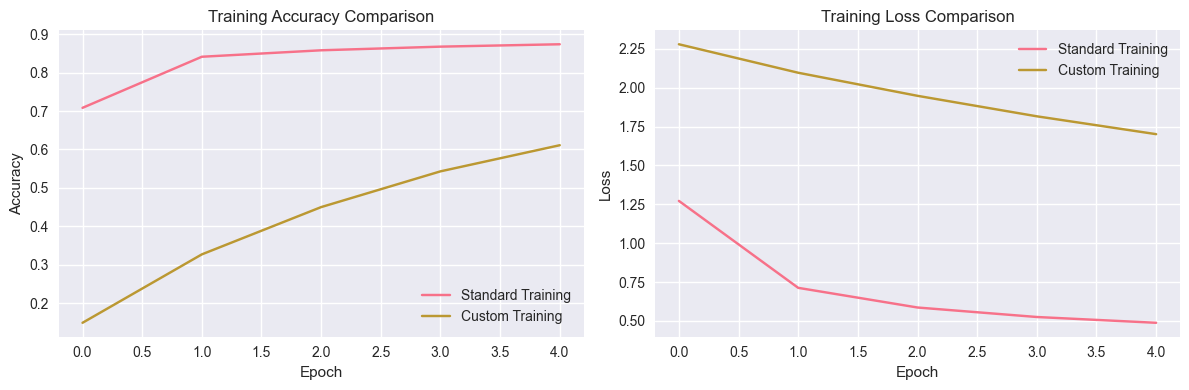

In [8]:
# Demonstrate custom training loop
custom_model = SoftmaxRegression(784, 10).create_model()
custom_trainer = CustomTrainer(custom_model)

print("Training with custom loop...")
custom_history = custom_trainer.train(
    X_train[:1000], Y_train[:1000],
    X_val[:200], Y_val[:200],
    epochs=5,
    batch_size=64,
    verbose=1
)

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(history.history['accuracy'][:5], label='Standard Training')
ax1.plot(custom_history['accuracy'], label='Custom Training')
ax1.set_title('Training Accuracy Comparison')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(history.history['loss'][:5], label='Standard Training')
ax2.plot(custom_history['loss'], label='Custom Training')
ax2.set_title('Training Loss Comparison')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

## Key Insights

1. **Model Performance**: The Softmax Regression achieves ~90% accuracy on MNIST
2. **Training Speed**: Converges quickly due to the simplicity of the model
3. **Custom vs Standard Training**: Both approaches yield similar results
4. **Gradient Flow**: No vanishing gradient problems for this simple model

## Next Steps

- Try different optimizers (Adam, RMSprop)
- Experiment with learning rate scheduling
- Add regularization techniques
- Compare with more complex models